In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import numpy as  np

In [9]:
df = pd.read_csv('maternaldata.csv')
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


In [10]:
df.shape

(1205, 12)

In [11]:
df.dtypes

Age                         int64
Systolic BP               float64
Diastolic                 float64
BS                        float64
Body Temp                   int64
BMI                       float64
Previous Complications    float64
Preexisting Diabetes      float64
Gestational Diabetes        int64
Mental Health               int64
Heart Rate                float64
Risk Level                 object
dtype: object

In [12]:
df.isnull().sum()

Age                        0
Systolic BP                5
Diastolic                  4
BS                         2
Body Temp                  0
BMI                       18
Previous Complications     2
Preexisting Diabetes       2
Gestational Diabetes       0
Mental Health              0
Heart Rate                 2
Risk Level                18
dtype: int64

In [13]:
df = df.drop_duplicates()
df.shape

(1187, 12)

In [14]:
18/1187

0.015164279696714406

In [15]:
df.dropna(subset=['Risk Level'], inplace=True)
df.shape

(1169, 12)

### Train Test Splitting

In [16]:

X_train, X_test, y_train, y_test = train_test_split(df.drop('Risk Level', axis=1), df['Risk Level'], test_size=0.2, random_state=42)

In [17]:
cols_to_fill = ['Systolic BP','Diastolic','BS','BMI','Heart Rate']
for col in cols_to_fill:
  X_train[col] = X_train[col].fillna(X_train[col].median())


In [18]:
X_train['Preexisting Diabetes'] = X_train['Preexisting Diabetes'].fillna(X_train['Preexisting Diabetes'].mode()[0])
X_train['Previous Complications'] = X_train['Previous Complications'].fillna(X_train['Previous Complications'].mode()[0])

print("Missing values in X_train after imputation:")
print(X_train.isnull().sum())

Missing values in X_train after imputation:
Age                       0
Systolic BP               0
Diastolic                 0
BS                        0
Body Temp                 0
BMI                       0
Previous Complications    0
Preexisting Diabetes      0
Gestational Diabetes      0
Mental Health             0
Heart Rate                0
dtype: int64


### EDA 

In [19]:
print(y_train.shape)

(935,)


In [20]:
y_train.isnull().sum()

0

In [21]:
print("Class counts:", y_train.value_counts())
print("\nClass proportion (%):\n", y_train.value_counts(normalize=True)*100)

Class counts: Risk Level
Low     555
High    380
Name: count, dtype: int64

Class proportion (%):
 Risk Level
Low     59.358289
High    40.641711
Name: proportion, dtype: float64


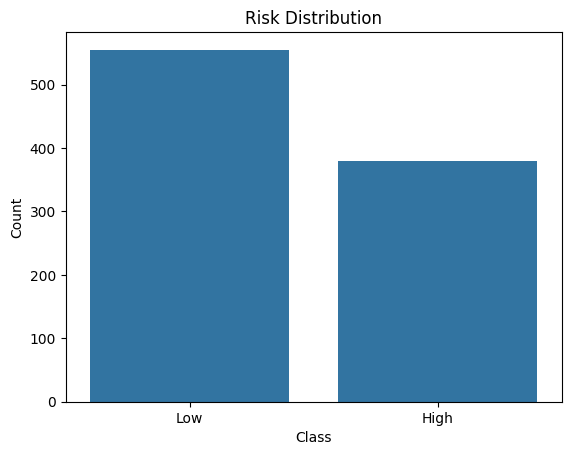

In [22]:
sns.countplot(x=y_train)
plt.title("Risk Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [23]:
print(X_train.shape)

(935, 11)


In [24]:
print("Duplicate rows:", X_train.duplicated().sum())


Duplicate rows: 0


In [25]:
X_train.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
598,23,140.0,90.0,6.8,98,23.0,0.0,0.0,0,0,70.0
186,28,140.0,90.0,8.0,98,25.7,0.0,1.0,0,1,80.0
762,25,120.0,90.0,6.7,101,21.0,0.0,0.0,0,0,80.0
180,25,130.0,100.0,7.8,98,30.6,0.0,0.0,1,1,86.0
604,19,120.0,80.0,4.0,98,20.0,0.0,0.0,0,0,70.0


In [26]:
X_train.dtypes

Age                         int64
Systolic BP               float64
Diastolic                 float64
BS                        float64
Body Temp                   int64
BMI                       float64
Previous Complications    float64
Preexisting Diabetes      float64
Gestational Diabetes        int64
Mental Health               int64
Heart Rate                float64
dtype: object

In [27]:
num_col = ['Age', 'Systolic BP', 'Diastolic','BS','Body Temp','BMI','Heart Rate']

cat_col = ['Preexisting Diabetes','Previous Complications','Gestational Diabetes','Mental Health']


In [28]:
X_train[num_col].describe()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Heart Rate
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,28.077005,116.879144,77.183957,7.583508,98.404278,23.424064,75.920856
std,13.462870,18.962584,14.371053,3.058551,1.101480,3.819743,7.281003
min,12.000000,70.000000,40.000000,3.000000,97.000000,15.000000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,21.000000,70.000000
50%,26.000000,120.000000,80.000000,6.900000,98.000000,23.000000,76.000000
75%,32.000000,130.000000,90.000000,8.000000,98.000000,25.200000,80.000000
max,325.000000,200.000000,130.000000,19.000000,103.000000,37.000000,92.000000


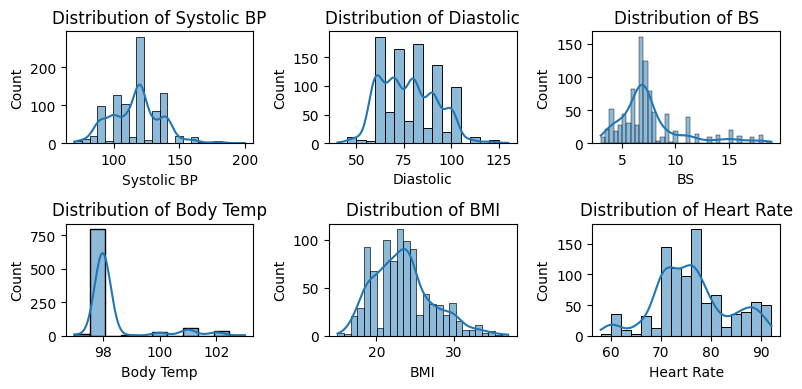

In [29]:
num_col = ['Systolic BP', 'Diastolic', 'BS', 'Body Temp', 'BMI', 'Heart Rate']

fig, axes = plt.subplots(2, 3, figsize=(8, 4))

for i, col in enumerate(num_col):
    row = i // 3 
    col_idx = i % 3  
    
    sns.histplot(X_train[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


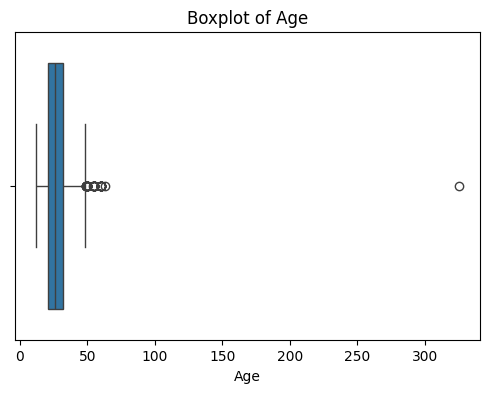

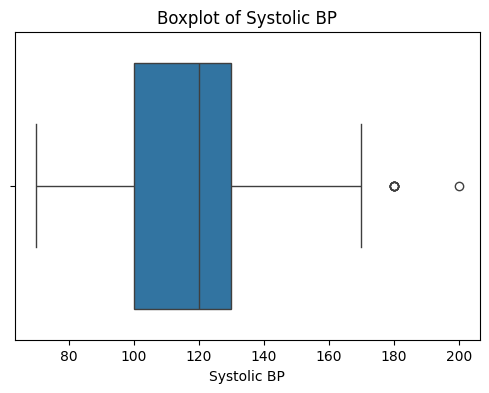

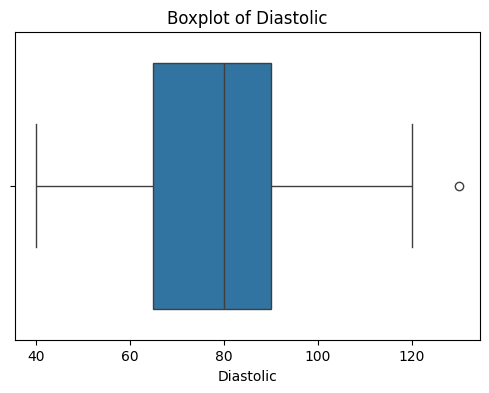

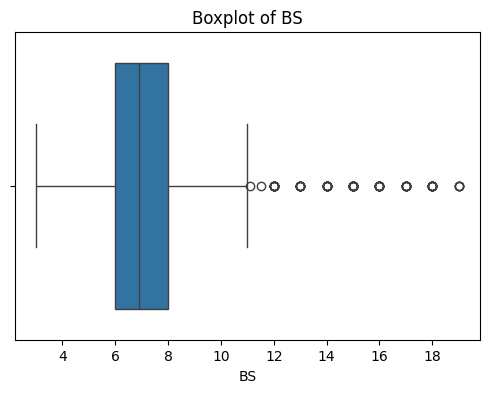

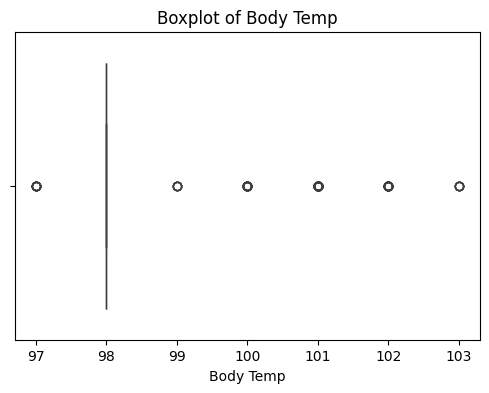

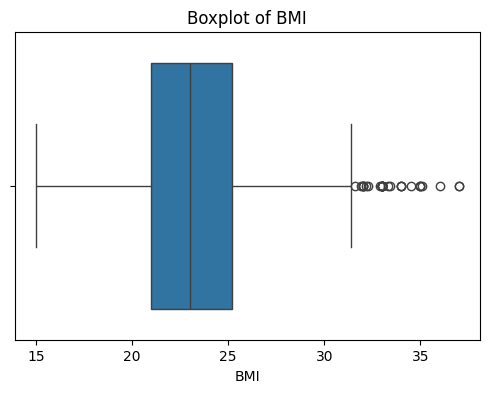

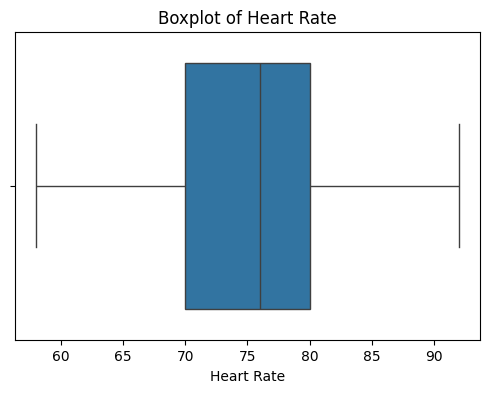

In [23]:
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=X_train[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

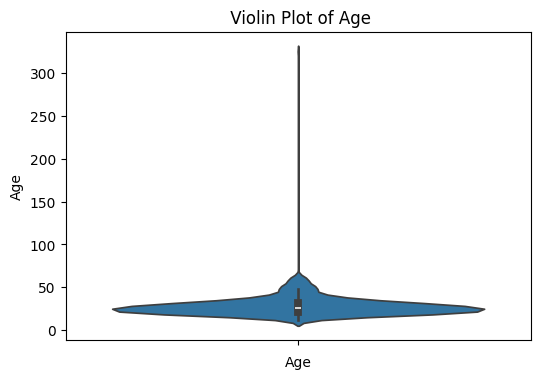

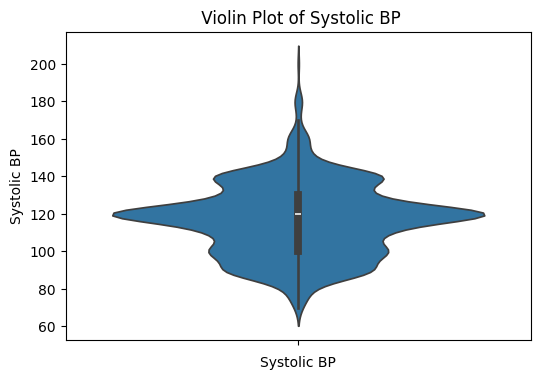

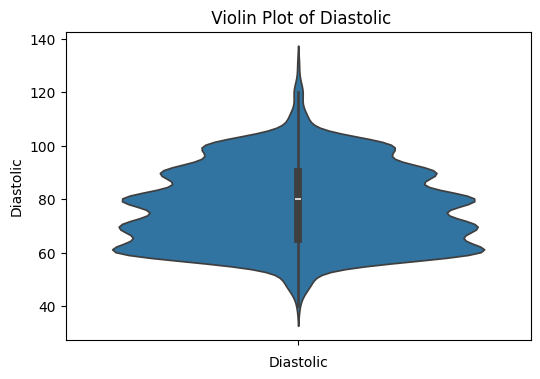

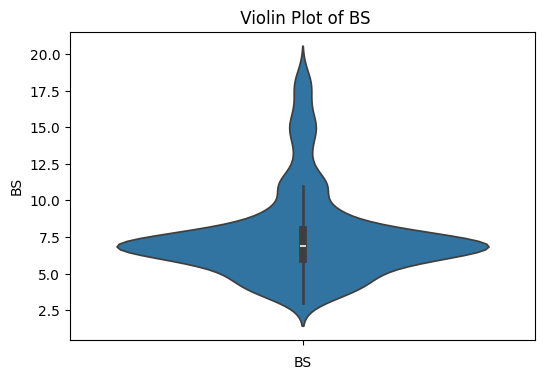

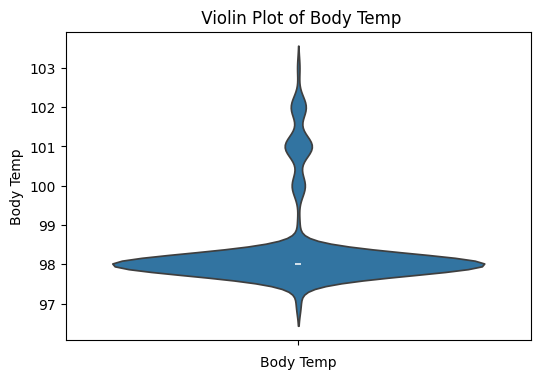

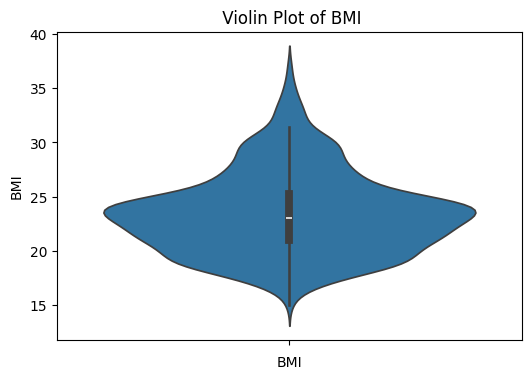

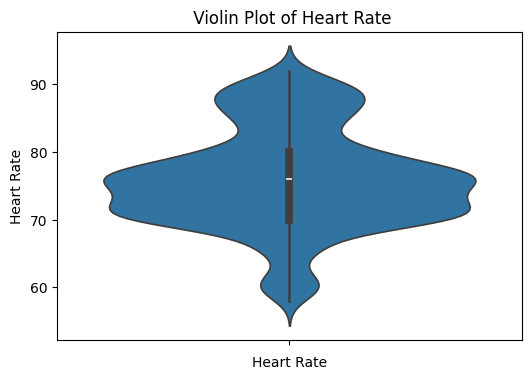

In [24]:
for col in num_col:
    plt.figure(figsize=(6, 4))
    sns.violinplot(y=X_train[col], inner="box")  
    plt.title(f" Violin Plot of {col}")
    plt.xlabel(col)
    plt.show()


In [25]:
cat_col = ['Previous Complications', 'Preexisting Diabetes','Gestational Diabetes','Mental Health']
for i in cat_col:
 print(X_train[i].value_counts())


Previous Complications
0.0    773
1.0    162
Name: count, dtype: int64
Preexisting Diabetes
0.0    659
1.0    276
Name: count, dtype: int64
Gestational Diabetes
0    824
1    111
Name: count, dtype: int64
Mental Health
0    604
1    331
Name: count, dtype: int64


In [55]:
cat_col = ['Previous Complications', 'Preexisting Diabetes', 'Gestational Diabetes', 'Mental Health']

for col in cat_col:
    print(f"\nColumn: {col}")
    counts = X_train[col].value_counts()
    percentages = X_train[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Count": counts, "Percentage": percentages.round(2)})
    print(summary)



Column: Previous Complications
                        Count  Percentage
Previous Complications                   
0.0                       773       82.67
1.0                       162       17.33

Column: Preexisting Diabetes
                      Count  Percentage
Preexisting Diabetes                   
0.0                     659       70.48
1.0                     276       29.52

Column: Gestational Diabetes
                      Count  Percentage
Gestational Diabetes                   
0                       824       88.13
1                       111       11.87

Column: Mental Health
               Count  Percentage
Mental Health                   
0                604        64.6
1                331        35.4


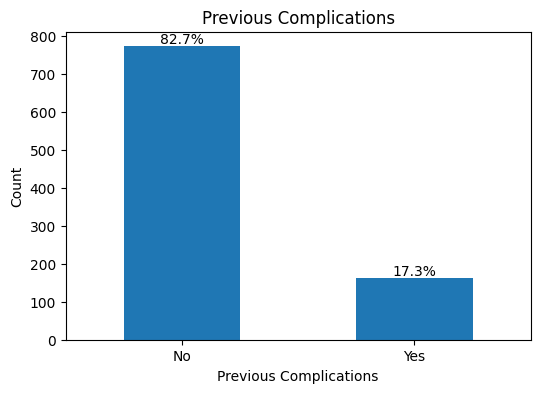

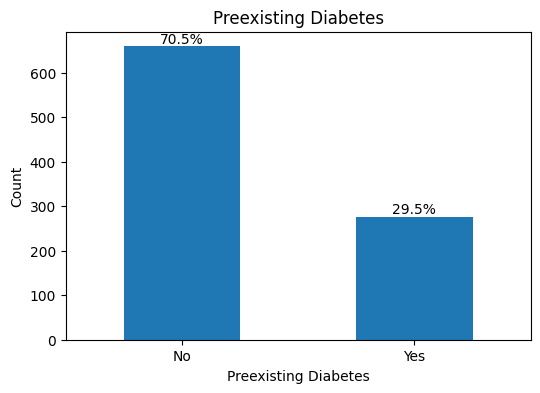

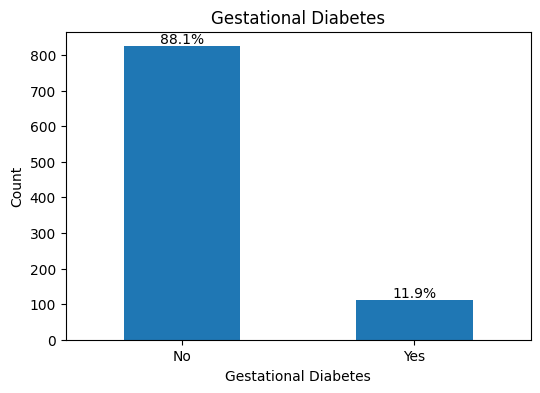

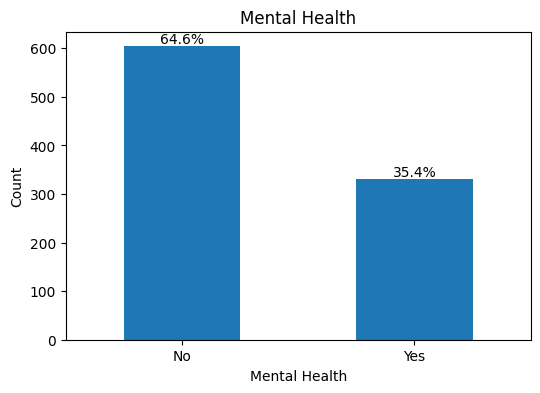

In [26]:
for col in cat_col:
    plt.figure(figsize=(6,4))
    ax = X_train[col].value_counts().rename_axis(col).plot(
        kind="bar",
        title=col
    )
    
    plt.xticks([0, 1], ["No", "Yes"], rotation=0)  
    plt.ylabel("Count")
    total = len(X_train[col])
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count/total:.1f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom')
    plt.show()


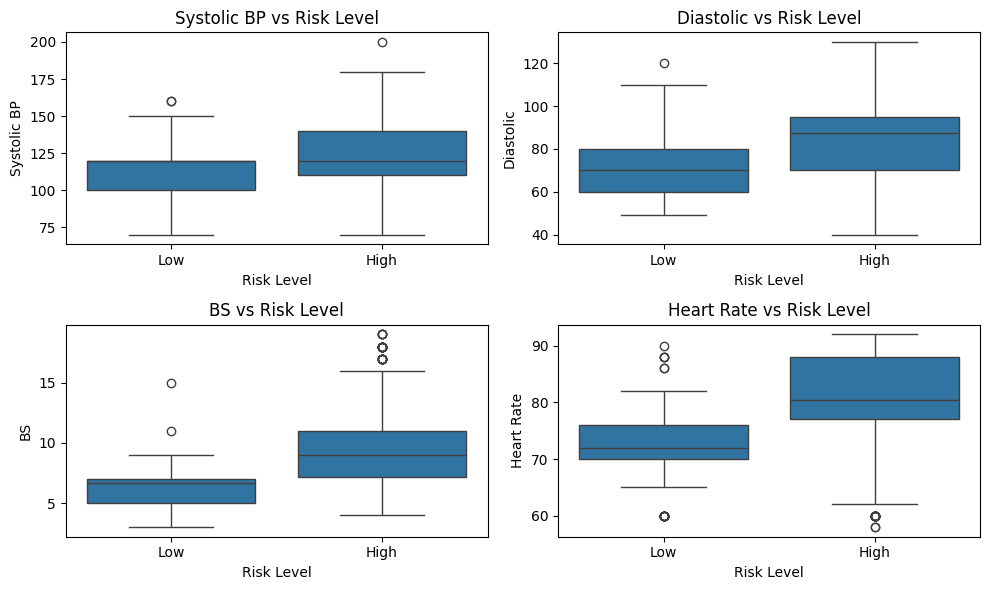

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

num_col = ['Systolic BP', 'Diastolic', 'BS', 'Heart Rate']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i, col in enumerate(num_col):
    row = i // 2  
    col_idx = i % 2
    sns.boxplot(x=y_train, y=X_train[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"{col} vs Risk Level")
    axes[row, col_idx].set_xlabel("Risk Level")
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()


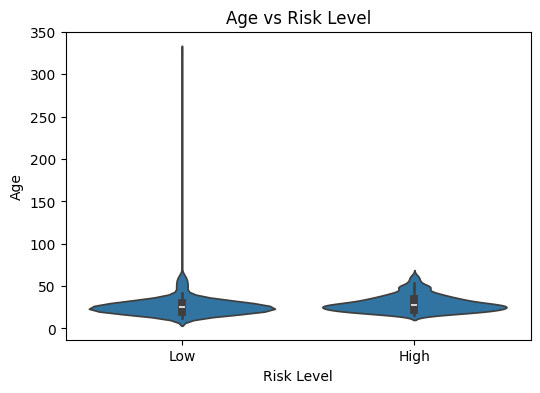

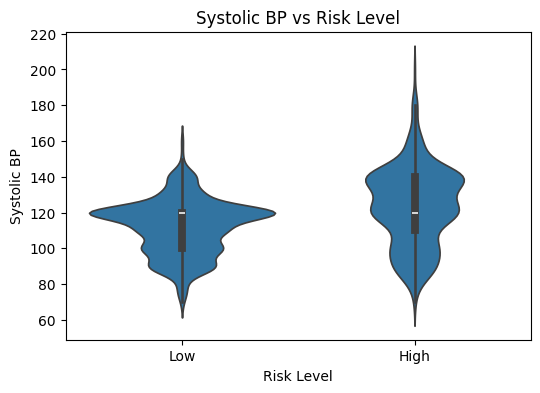

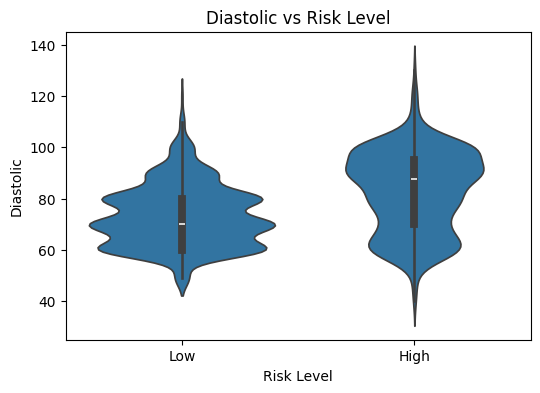

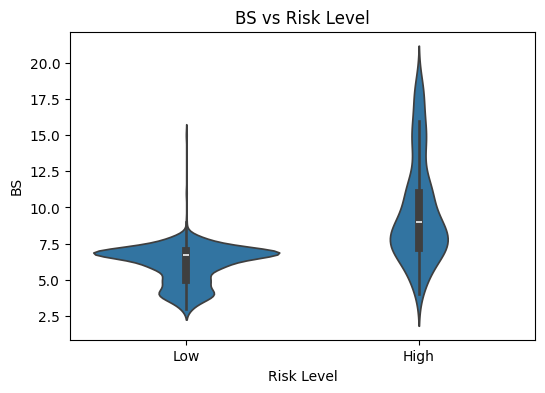

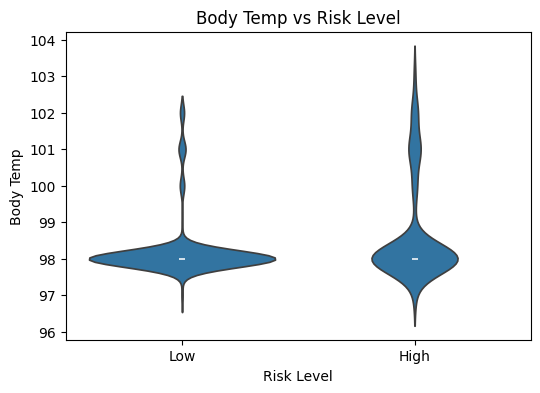

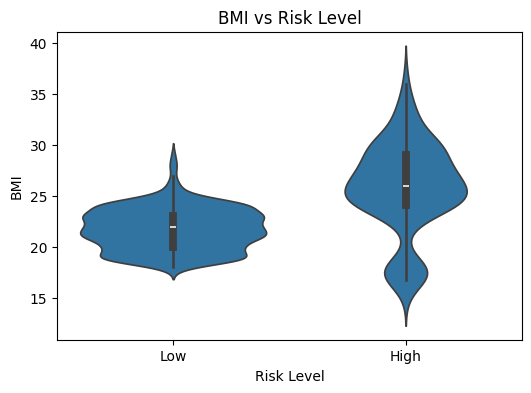

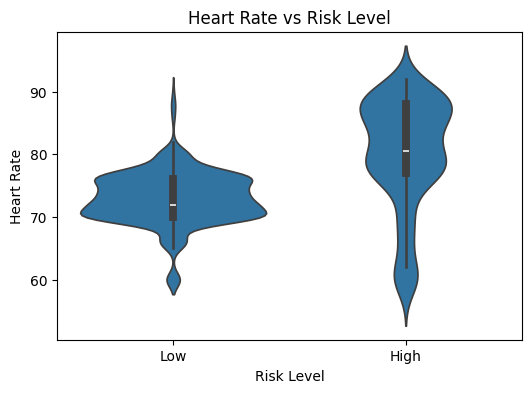

In [28]:
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.violinplot(x=y_train, y=X_train[col], inner="box")  
    plt.title(f"{col} vs Risk Level")
    plt.xlabel("Risk Level")
    plt.ylabel(col)
    plt.show()


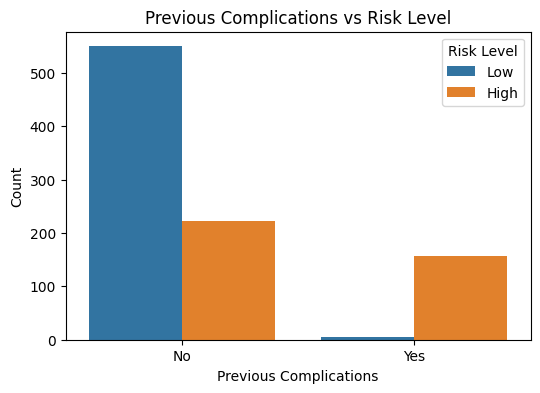

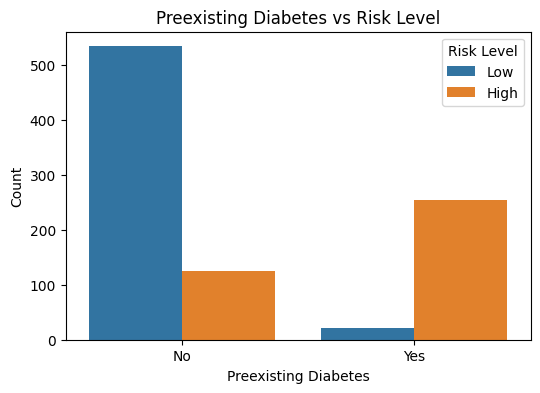

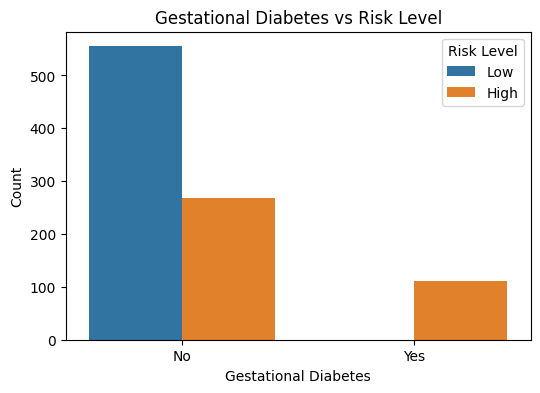

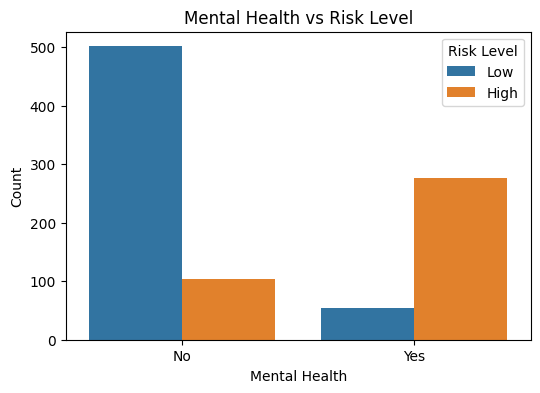

In [29]:
cat_col = ['Previous Complications', 'Preexisting Diabetes', 'Gestational Diabetes', 'Mental Health']

for col in cat_col:
    plt.figure(figsize=(6,4))
    sns.countplot(data=X_train.join(y_train), x=col, hue='Risk Level')
    plt.xticks([0, 1], ["No", "Yes"], rotation=0)  
    plt.title(f"{col} vs Risk Level")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Risk Level")
    plt.show()


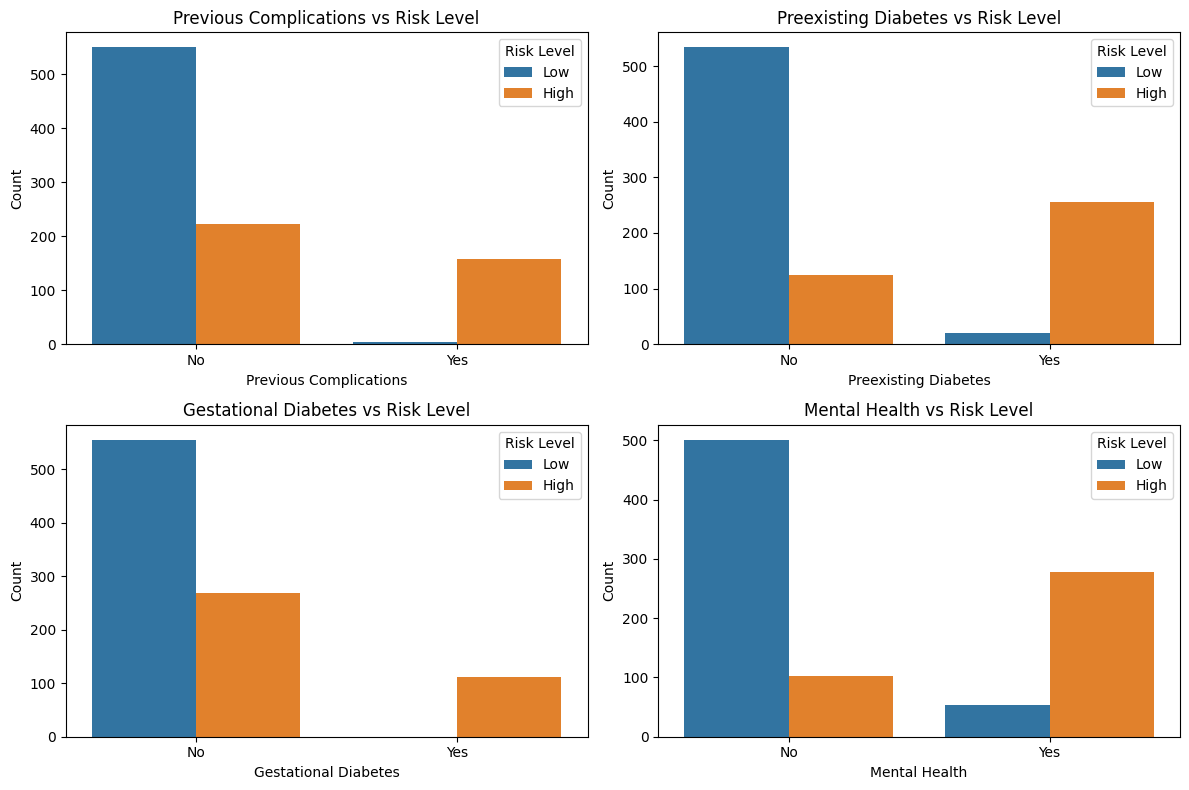

In [56]:

cat_col = ['Previous Complications', 'Preexisting Diabetes', 'Gestational Diabetes', 'Mental Health']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(cat_col):
    sns.countplot(data=X_train.join(y_train), x=col, hue='Risk Level', ax=axes[i])
    
    if X_train[col].nunique() == 2:
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["No", "Yes"])
    
    axes[i].set_title(f"{col} vs Risk Level")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Risk Level")

plt.tight_layout()
plt.show()


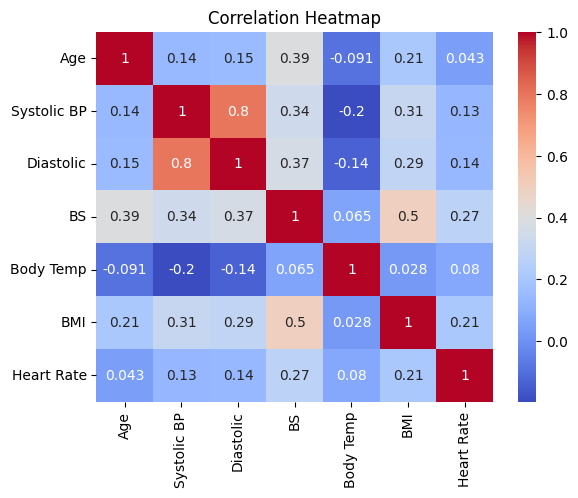

In [30]:
X_train1 = X_train[num_col]
sns.heatmap(X_train1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
X_train1 = X_train[num_col]
X_train1.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Heart Rate
598,23,140.0,90.0,6.8,98,23.0,70.0
186,28,140.0,90.0,8.0,98,25.7,80.0
762,25,120.0,90.0,6.7,101,21.0,80.0
180,25,130.0,100.0,7.8,98,30.6,86.0
604,19,120.0,80.0,4.0,98,20.0,70.0


In [32]:
X_train2 = X_train[cat_col].astype(str)
X_train2.head()

,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health
598,0.0,0.0,0,0
186,0.0,1.0,0,1
762,0.0,0.0,0,0
180,0.0,0.0,1,1
604,0.0,0.0,0,0


In [33]:
X_train3 = pd.concat([X_train1,X_train2], axis=1)
X_train3.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Heart Rate,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health
598,23,140.0,90.0,6.8,98,23.0,70.0,0.0,0.0,0,0
186,28,140.0,90.0,8.0,98,25.7,80.0,0.0,1.0,0,1
762,25,120.0,90.0,6.7,101,21.0,80.0,0.0,0.0,0,0
180,25,130.0,100.0,7.8,98,30.6,86.0,0.0,0.0,1,1
604,19,120.0,80.0,4.0,98,20.0,70.0,0.0,0.0,0,0


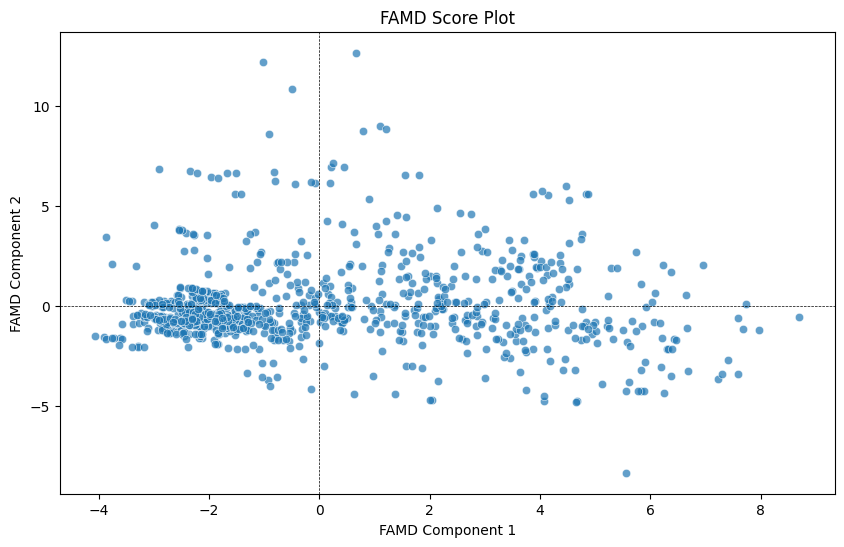

In [34]:
import prince

famd = prince.FAMD(n_components=5, random_state=42)
famd_data = famd.fit_transform(X_train3)  # df = your original mixed data



famd_scores = famd.transform(X_train3)

# Plotting FAMD score plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=famd_scores.iloc[:, 0], y=famd_scores.iloc[:, 1], alpha=0.7)
#sns.scatterplot(x=famd_scores[0], y=famd_scores[1], alpha=0.7)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot")
plt.show()

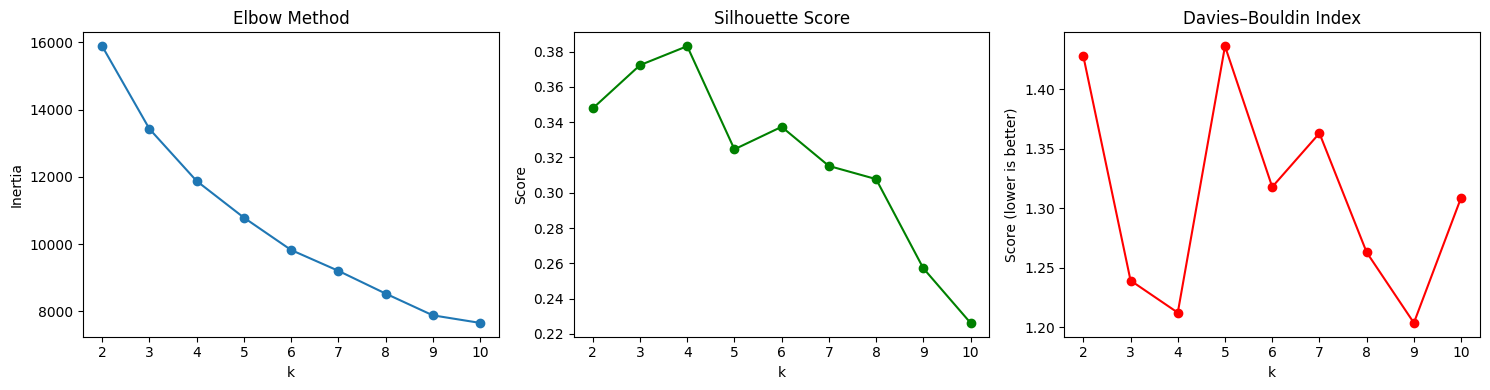

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

inertias = []
silhouettes = []
db_scores = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    preds = model.fit_predict(famd_data)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(famd_data, preds))
    db_scores.append(davies_bouldin_score(famd_data, preds))


plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(K, inertias, 'o-')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(K, silhouettes, 'o-', color='green')
plt.title('Silhouette Score')plt.xlabel('k')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.plot(K, db_scores, 'o-', color='red')
plt.title('Davies–Bouldin Index')
plt.xlabel('k')
plt.ylabel('Score (lower is better)')

plt.tight_layout()
plt.show()

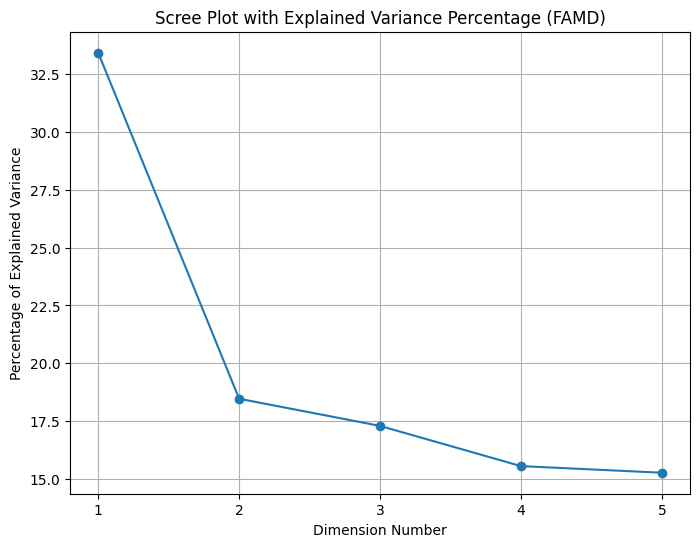

In [36]:

eigenvalues = famd.eigenvalues_
explained_variance_ratio = (eigenvalues / eigenvalues.sum()) * 100

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot with Explained Variance Percentage (FAMD)')
plt.xlabel('Dimension Number')
plt.ylabel('Percentage of Explained Variance')
plt.grid(True)
plt.xticks(range(1, len(explained_variance_ratio) + 1)
plt.show()